In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

In [3]:
def critical_z(alpha=0.05, tail="two"):
    """
    Given significance level, compute critical value.
    """
    if tail == "two":
        p = 1 - alpha / 2
    else:
        p = 1 - alpha
        
    return norm.ppf(p)

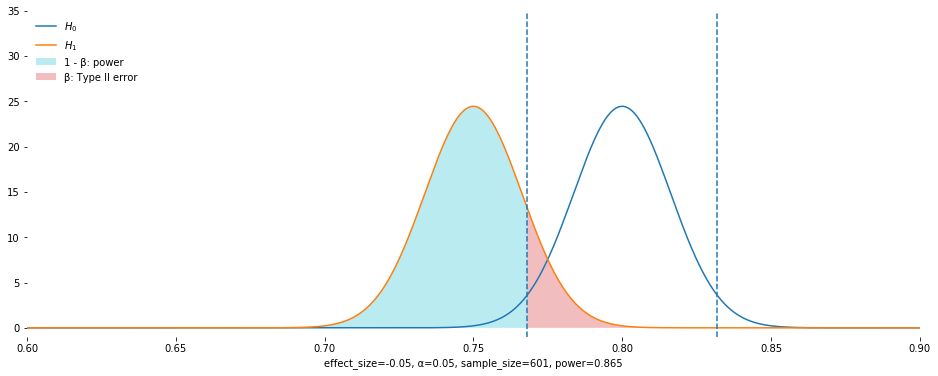

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))

def plot_dist(ax, frame):
    ax.cla()
    
    # one-tailed z-test
    h_0 = 0.8
    h_1 = 0.75
    
    alpha = 0.05 
    
    n = list(range(1, 1000)) [frame]
    
    tail = "two"
    se = np.sqrt(h_0 * (1 - h_0) / n)

    z = critical_z(alpha=alpha, tail=tail)
    
    lower = h_0 - z * se
    upper = h_0 + z * se
    
    lower_a = norm.cdf(lower, h_1, se)
    upper_a = 1 - norm.cdf(upper, h_1, se)
    
    x = np.linspace(0.6, 0.9, 10000)
    norm_0 = norm.pdf(x, loc=h_0, scale=se)
    norm_1 = norm.pdf(x, loc=h_1, scale=se)
    ax.plot(x, norm_0, label='$H_0$')
    ax.plot(x, norm_1, label='$H_1$')
    ax.set_xlabel("sampling_statistic")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    if tail == "two":
        ax.axvline(lower, linestyle="--")
        ax.axvline(upper, linestyle="--")
        ax.fill_between(x, [0], norm_1, where=x > upper, facecolor='C9', interpolate=True, alpha=0.3)
        ax.fill_between(x, [0], norm_1, where=x < lower, facecolor='C9', interpolate=True, alpha=0.3, label="1 - \u03B2: power")
        ax.fill_between(x, [0], norm_1, 
                        where=(x > lower) & (x < upper), facecolor='C3', 
                        interpolate=True, alpha=0.3, label="\u03B2: Type II error")
        power = lower_a + upper_a
    
    elif tail == "left":
        ax.axvline(lower, linestyle="--")
        ax.fill_between(x, [0], norm_1, where=x < lower, facecolor='C1', interpolate=True, alpha=0.2, label="1 - \u03B2: power")
        ax.fill_between(x, [0], norm_1, where=x > lower, facecolor='C9', interpolate=True, alpha=0.2, label="\u03B2: Type II err")
        power = lower_a
    
    elif tail == "right":
        ax.axvline(upper, linestyle="--")
        ax.fill_between(x, [0], norm_1, where=x > upper, facecolor='C1', interpolate=True, alpha=0.2, label="1 - \u03B2: power")
        ax.fill_between(x, [0], norm_1, where=x > upper, facecolor='C9', interpolate=True, alpha=0.2, label="\u03B2: Type II err")
        power = upper_a
    ax.legend(frameon=False, loc="upper left")
    ax.set_xlabel("effect_size=%.2f, \u03B1=%.2f, sample_size=%i, power=%.3f"%(h_1-h_0, alpha, n, power))
    ax.set_ylim(-1, 35)
    ax.set_xlim(0.6, 0.9)
    return ax

plot_dist(ax, 600)

In [5]:
fps = 48
duration = 3

end = 999
batch = int(end / (duration * fps))
print("batch", batch)

frames = []
for i in range(end // batch + 1):
    idx_end = min(end - 1, (i + 1) * batch)
    frames.append(idx_end)

batch 6


In [9]:
def update(i):
    print('frame %i'%i, end="\r")
    return plot_dist(ax, i)

anim = FuncAnimation(fig, update, frames=frames, interval=1000 / fps)
fname = 'power&sample_size_%is_%ifps.gif'%(duration, fps)

# uncomment to save animation
# anim.save(fname, dpi=80, writer='imagemagick')

print(fname)


#plt.close()

power&sample_size_3s_48fps.gif
